In [41]:
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [42]:
class LinearRegression():

  def __init__(self, lr, epochs, w=random.uniform(0,1)):
    self.lr = lr
    self.epochs = epochs
    self.w = w
    self.w_first = w

  def fit(self, X, Y):
    for e in range(self.epochs):
      for x, y in zip(X, Y):
        y_new = self.w * x
        E = y - y_new
        self.w = self.w + self.lr * (E/x)

  def predict(self, X):
    return [self.w*x for x in X]
  
  def MSE (self, X, Y):
    n = len(X)
    sum = 0
    Y_pred = self.predict(X)
    for y, y_n in zip(Y, Y_pred):
      sum += (y - y_n)**2
      error = sum / n
    return error
  
  def MAE (self, X, Y):
    n = len(X)
    sum = 0
    Y_pred = self.predict(X)
    for y, y_n in zip(Y, Y_pred):
      sum += abs(y - y_n)
      error = sum / n
    return error

In [43]:
lr = 0.001
epochs = 3000
w = 0.4

X_train = [6.3, 8, 9.8, 14.2, 16, 17.3, 23]
Y_train = [40, 60, 90.1, 137, 117, 130.9, 154.1]

X_test = [12.7, 20]
Y_test = [115, 146]

In [44]:
fuel_rate = LinearRegression(lr, epochs, w)

# Обучаем модель
fuel_rate.fit(X_train, Y_train)

# Выводим начальный коэффициент
print(f'Начальное значение коэффициента: w = {fuel_rate.w_first}')

# Выводим получившийся коэффициент
print(f'Получившееся значение коэффициента: w = {fuel_rate.w}')

Начальное значение коэффициента: w = 0.4
Получившееся значение коэффициента: w = 7.752748190872693


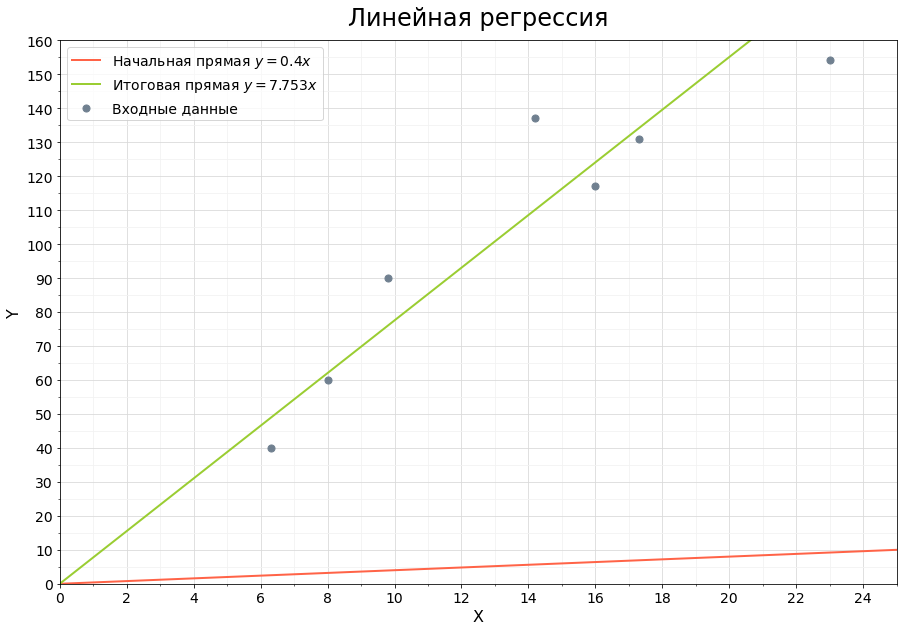

In [45]:
# Строим графики

xlim = (0, 25)
ylim = (0, 160)

fig, ax = plt.subplots(figsize=(15,10), dpi=72)
ax.set_title('Линейная регрессия', pad='15', fontsize=24)

ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)

ax.set(xlim=xlim, ylim=ylim)

ax.tick_params(axis='both', labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

ax.grid(True, color='0.85', linestyle='-')
ax.grid(which='minor', color='0.95', linestyle='-')

ax.scatter(X_train, Y_train,
           color='slategrey', 
           s=50, zorder=2,
           label='Входные данные')

ax.plot(xlim, [fuel_rate.w_first*x for x in xlim], 
        'tomato', linewidth=2, 
        label=f'Начальная прямая $y = {fuel_rate.w_first}x$')

ax.plot(xlim, fuel_rate.predict(xlim), 
        'yellowgreen', linewidth=2, 
        label=f'Итоговая прямая $y = {round(fuel_rate.w, 3)}x$')

# Отображение графиков
ax.legend(loc='best', fontsize=14)
#plt.savefig('my_plot.png', transparent= True)
plt.show()

In [46]:
fuel_rate.predict(X_test)

[98.45990202408319, 155.05496381745385]

In [47]:
fuel_rate.MSE(X_test, Y_test)

177.78360539416286

In [48]:
fuel_rate.MAE(X_test, Y_test)

12.79753089668533